<a href="https://colab.research.google.com/github/edcalderin/DeepLearning_SaturdaysAI/blob/master/1_DeepLearning_Fundaments/clase_1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Perceptron

## Funciones de activación

### Step Function
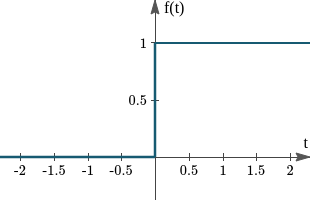

In [ ]:
def step_function(x):
    return np.heaviside(x,1)

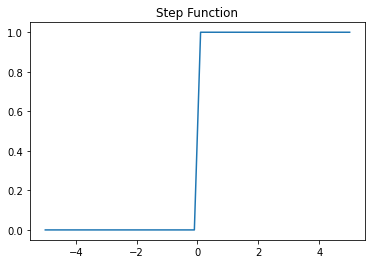

In [ ]:
x = np.linspace(-5, 5)
plt.plot(x, step_function(x))
plt.axis('tight')
plt.title('Step Function')
plt.show()

### Sigmoid Function

In [ ]:
def sigmoid_function(x):
  sf = 1/(1 + np.exp(-x))
  return sf

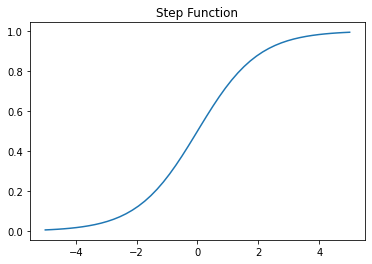

In [ ]:
x = np.linspace(-5, 5)
plt.plot(x, sigmoid_function(x))
plt.axis('tight')
plt.title('Step Function')
plt.show()

## ReLU Function
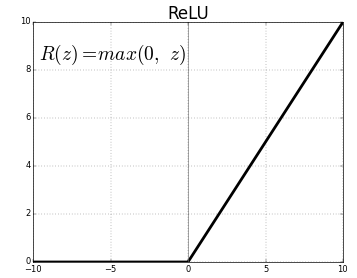

In [ ]:
def relu_function(x):
  #return np.where(x<0, 0, x)
  return np.maximum(0, x)

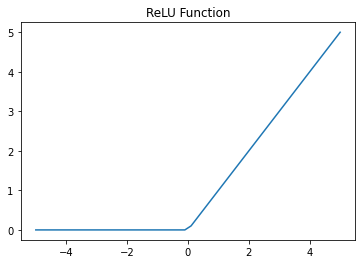

In [ ]:
x = np.linspace(-5, 5)
plt.plot(x, relu_function(x))
plt.axis('tight')
plt.title('ReLU Function')
plt.show()

In [ ]:
# Reto: Hacer Leaky Rl

## Perceptron

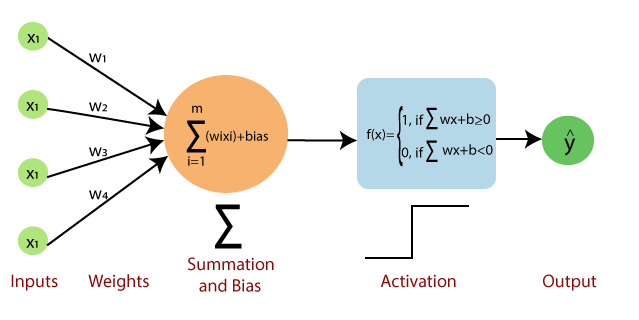


### Función de activación: Unit Step
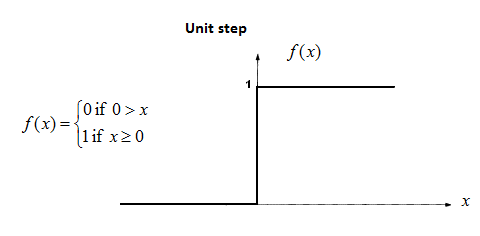

In [ ]:
# Poner código acá
def unit_step(v):
	return v>0

### Sumatoria con bias

In [ ]:
def perceptron(x, w, b):
	p = np.dot(x,w) + b
    fa = unit_step(p)
    return fa

### AND
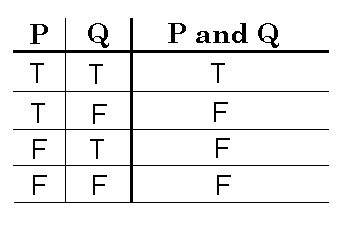

In [ ]:
def perceptron_and(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptron(x, w, b)

In [ ]:
tabla_and = np.array([[1,1],[1,0],[0,1],[0,0]])

In [ ]:
tabla_and.shape[0]

In [ ]:
for i in range(tabla_and.shape[0]):
  print(tabla_and[i,:])

In [ ]:
for i in range(tabla_and.shape[0]):
  print(perceptron_and(tabla_and[i,:]))

In [ ]:
for i in range(tabla_and.shape[0]):
  print(f'{tabla_and[i,:][0]}, {tabla_and[i,:][1]} = {perceptron_and(tabla_and[i,:])}')

### OR

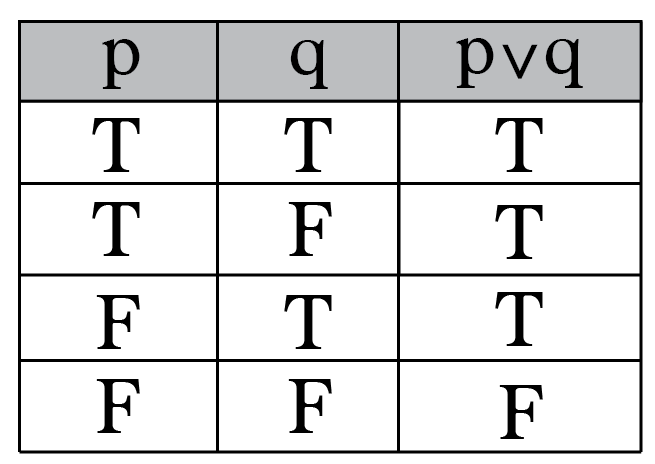

In [ ]:
def perceptron_or(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

### NOT
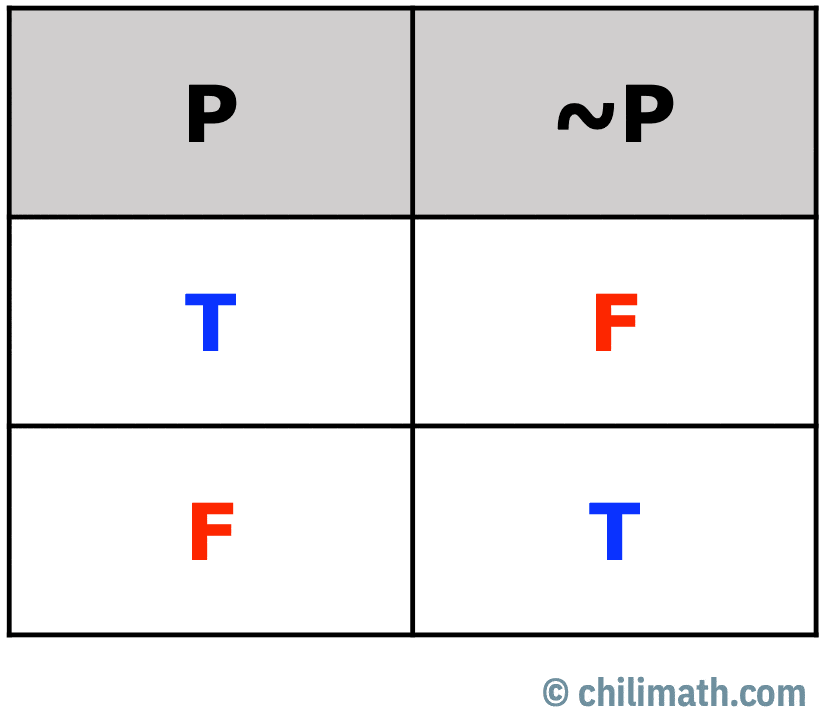

In [ ]:
def perceptron_not(x):
	return perceptron(x, w=-1, b=0.5)

### XOR
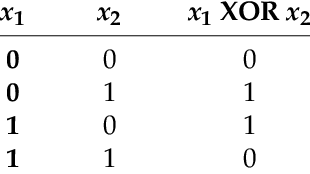

### Desglozamos el problema:
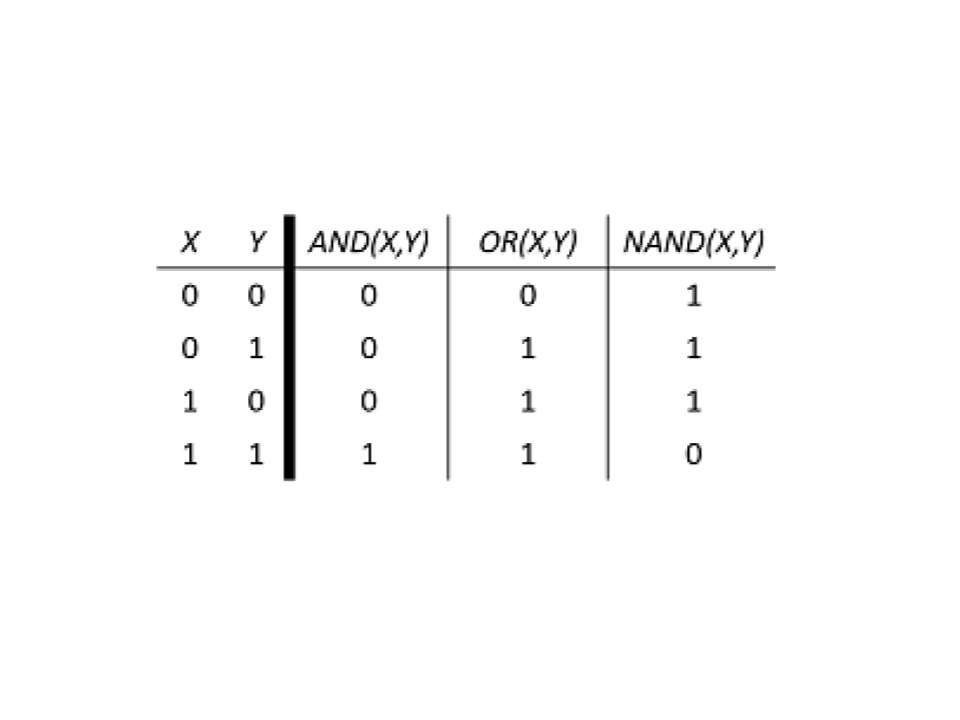

<br>

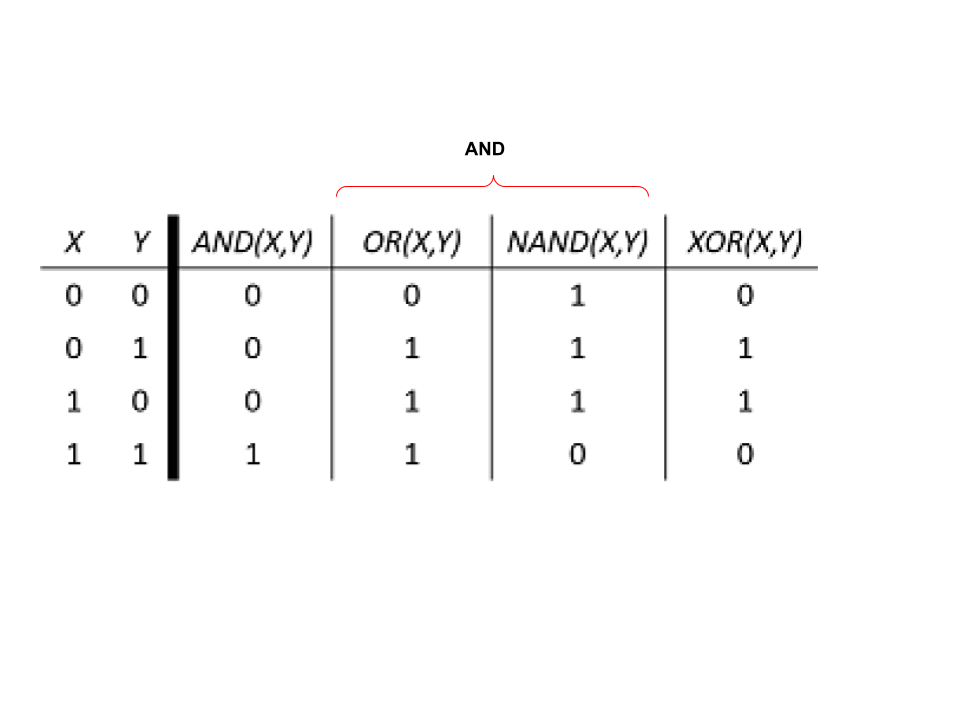

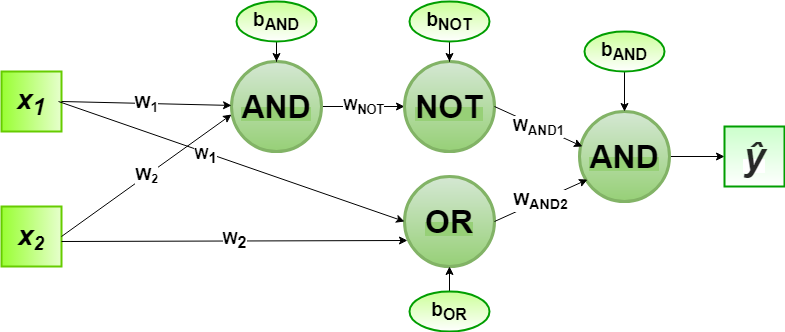

In [ ]:

def nn_xor(x):
    res_and = perceptron_and(x)

    res_not_and = perceptron_not(res_and)

    res_or = perceptron_or(x)

    new_x = np.array([res_not_and, res_or])
    output = perceptron_and(new_x)

    return output

In [ ]:
for i in range(tabla_and.shape[0]):
  print(f'{tabla_and[i,:][0]}, {tabla_and[i,:][1]} = {nn_xor(tabla_and[i,:])}')

## Perceptron Training
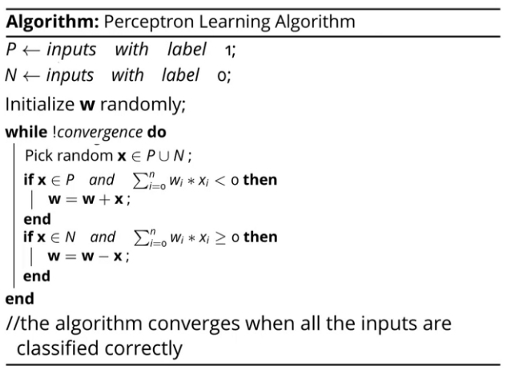

In [ ]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')


In [ ]:
X[28]

In [ ]:
def perceptron(X, y, lr, epochs):

    num_registros = X.shape[0]
    num_features = X.shape[1]

    pesos = np.zeros((num_features +1,1)) # ¿por qué +1?
    
    for epoch in range(epochs):
        
        for indice, registro in enumerate(X):
  
            registro = np.insert(registro, 0, 1).reshape(-1,1)
            
            y_prediccion = unit_step(np.dot(registro.T, pesos))
            
            if (np.squeeze(y_prediccion) - y[indice]) != 0:
                pesos += lr*((y[indice] - y_prediccion)*registro)

        
    return pesos

In [ ]:

def plot_decision_boundary(X, theta):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c

    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.title("Perceptron")
    plt.plot(x1, x2, 'y-')

In [ ]:
pesos= perceptron(X, y, 0.5, 500)
plot_decision_boundary(X, pesos)